In [ ]:
#install necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import spacy


In [ ]:
#reading data using pandas
tweets=pd.read_csv('/content/drive/MyDrive/Twitter_Climate_Analysis/twitter_sentiment_data.csv')
tweets.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
tweets.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


In [ ]:
tweets.shape

(43943, 3)

In [ ]:
#get count and percentage of each category
value_counts = tweets["sentiment"].value_counts()
value_counts.name = "Count"

value_normd = tweets["sentiment"].value_counts(normalize=True)
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))

,Count,Percentage
1,22962,0.522541
2,9276,0.211092
0,7715,0.175568
-1,3990,0.090799


In [ ]:
tweets.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
dict={-1:'Anti',0:'Neutral',1:'Pro',2:'News'}
tweets['Analysis']= [dict[tweets['sentiment'][i]] for i in tweets.index]

tweets.head()

,sentiment,message,tweetid,Analysis
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,Anti
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,Pro
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,Pro
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,Pro
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,News


In [ ]:
sns.set(font_scale=1.5)
style.use("seaborn-poster")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


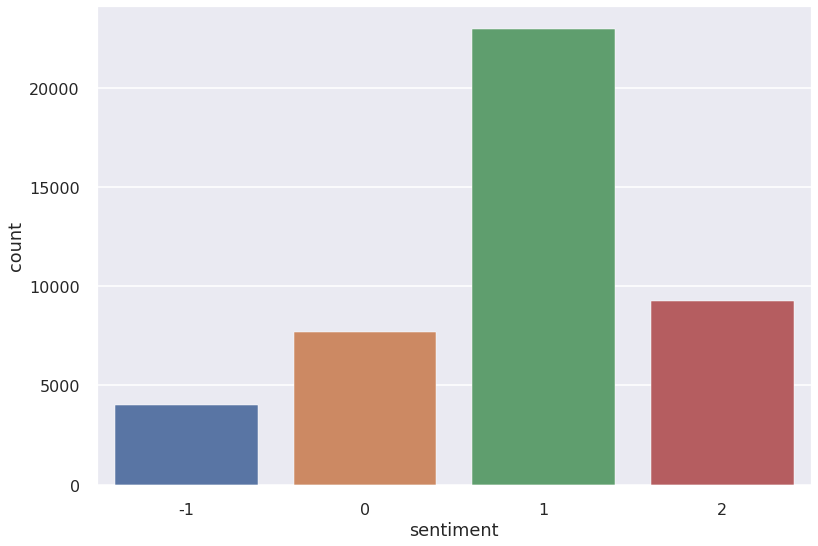

In [ ]:
#plotting of bar chart

sns.countplot(tweets["sentiment"])
labels = list(dict.values())


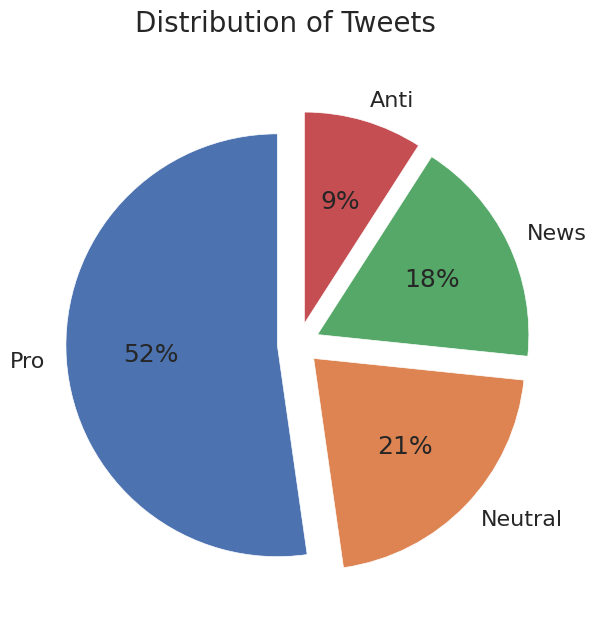

In [ ]:
#plotting of pie chart
fig, axes = plt.subplots(1, 1, figsize=(10, 7), dpi=100)
labels=['Pro','Neutral','News','Anti']
axes.pie(tweets["sentiment"].value_counts(),
            autopct="%1.0f%%",
            startangle=90,
            labels=labels,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=20)
plt.show()

In [ ]:
import re
import nltk
import itertools
from tqdm import trange, tqdm


In [ ]:
#get top 15 hashtags in a tweet in the order of maximum occurence
top15 = {}
by_sentiment = tweets.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    hash_tags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hash_tags = itertools.chain(*hash_tags)
    hash_tags = [ht.lower() for ht in hash_tags]
    
    frequency = nltk.FreqDist(hash_tags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)
display(pd.concat(top15, axis=1).head(n=10))

100%|██████████| 4/4 [00:00<00:00, 12.88it/s]


-1                     0                       1         \
        hashtags counts       hashtags counts         hashtags counts   
0           tcot     59        climate     59          climate    541   
1           maga     31  climatechange     51    climatechange    384   
2        climate     25          trump     20   beforetheflood    265   
3  climatechange     25  globalwarming     18     actonclimate    156   
4          pjnet     23    debatenight     16   parisagreement    108   
5          trump     21          cop21     14  imvotingbecause     93   
6  globalwarming     19         auspol     13            cop22     86   
7       fakenews     15          cop22     11           auspol     76   
8             p2     13        science      9            cop21     73   
9       teaparty     11           maga      9    globalwarming     73   

               2         
        hashtags counts  
0        climate    330  
1  climatechange    171  
2           news     80  
3    environment     77  
4          trump     49  
5        science     42  
6  globalwarming     29  
7          cop22     26  
8             p2     22  
9          cop21     21

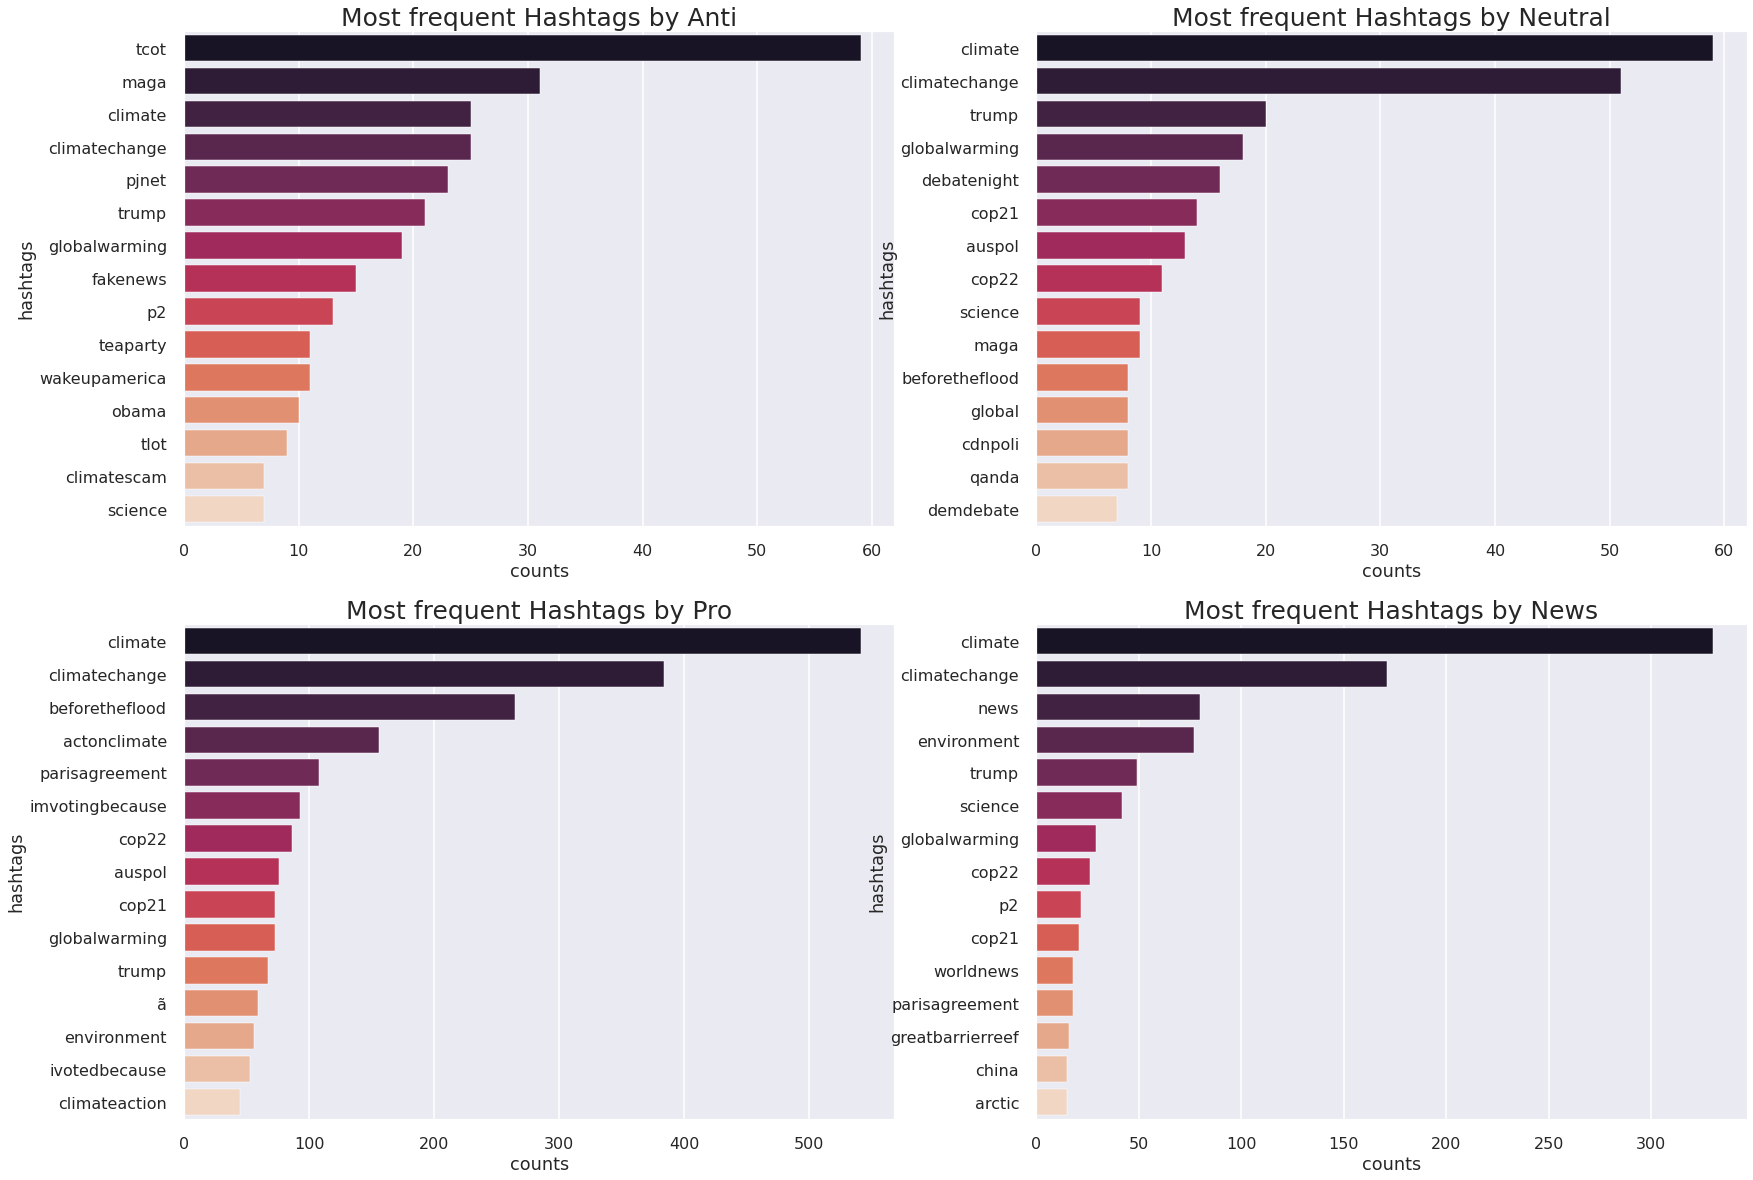

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0
# plt.title("Most frequent Hashtags by sentiment")
for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="rocket", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent Hashtags by {dict[sentiment]}", fontsize=25)
    counter += 1


plt.show()


In [ ]:
#data cleaning using regex
def cleaner(tweet):
    tweet = tweet.lower()
    
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [ ]:
tweets["message"] = tweets["message"].apply(cleaner)
tweets.head()

,sentiment,message,tweetid,Analysis
0,-1,climate change is an interesting hustle as it ...,792927353886371840,Anti
1,1,rt watch right here as travels the world to ta...,793124211518832641,Pro
2,1,fabulous leonardo s film on change is brillian...,793124402388832256,Pro
3,1,rt just watched this amazing documentary by le...,793124635873275904,Pro
4,2,rt pranita biswasi a lutheran from odisha give...,793125156185137153,News


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download()
# nltk.download()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def string_to_wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, string_to_wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [ ]:
tweets = lemmatizer(tweets)
tweets.head()

,sentiment,message,tweetid,Analysis,length,tokenized,parts-of-speech,lemmatized
0,-1,climate change is an interesting hustle as it ...,792927353886371840,Anti,122,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,1,rt watch right here as travels the world to ta...,793124211518832641,Pro,76,"[rt, watch, right, here, as, travels, the, wor...","[(rt, n), (watch, n), (right, r), (here, r), (...",rt watch right here a travel the world to tack...
2,1,fabulous leonardo s film on change is brillian...,793124402388832256,Pro,61,"[fabulous, leonardo, s, film, on, change, is, ...","[(fabulous, a), (leonardo, n), (s, n), (film, ...",fabulous leonardo s film on change be brillian...
3,1,rt just watched this amazing documentary by le...,793124635873275904,Pro,104,"[rt, just, watched, this, amazing, documentary...","[(rt, n), (just, r), (watched, v), (this, n), ...",rt just watch this amazing documentary by leon...
4,2,rt pranita biswasi a lutheran from odisha give...,793125156185137153,News,125,"[rt, pranita, biswasi, a, lutheran, from, odis...","[(rt, n), (pranita, n), (biswasi, v), (a, n), ...",rt pranita biswasi a lutheran from odisha give...


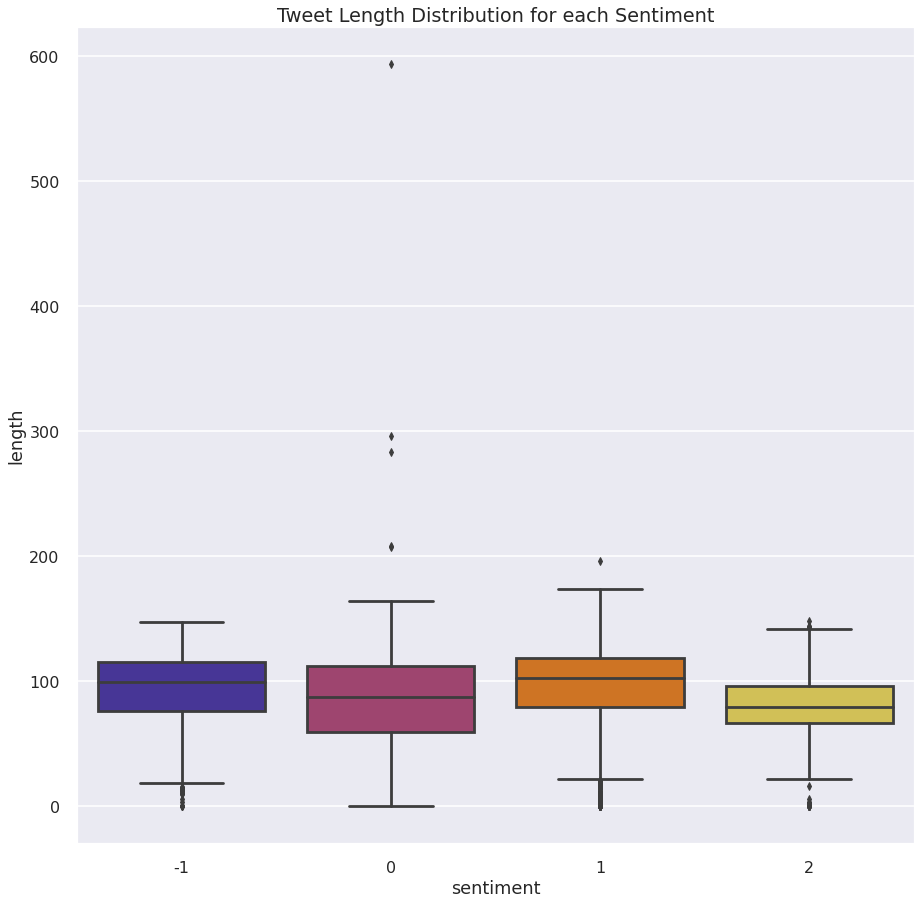

In [ ]:
#plotting of box plot
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment", y="length", data=tweets, palette=("CMRmap"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()

In [ ]:
#extract important keywords in the order of maximum occurence
frequency = {}

by_sentiment = tweets.groupby("Analysis")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

100%|██████████| 4/4 [00:00<00:00,  5.17it/s]


Anti        Neutral             News              Pro       
         word  freq     word  freq       word  freq       word   freq
0     climate  2368  climate  4579     change  8172     change  19350
1      change  2285   change  4572    climate  8077    climate  19234
2          rt  2069       rt  3493         rt  5076         rt  14666
3      global  1964   global  3231      trump  2003     global   4286
4     warming  1497  warming  2600     global  1411    warming   3141
5        warm   406     warm   572        say   947      trump   2245
6        make   254      say   519    warming   912    believe   2151
7         amp   228    trump   469        new   573        amp   1692
8         say   224      amp   353  scientist   556      think   1620
9         man   222     like   329        epa   545      doesn   1303
10      cause   211    think   324      fight   476       real   1303
11       just   207    cause   318      study   415      world   1155
12       year   200     real   294      world   360     people   1143
13    science   189     just   289      obama   338        say   1139
14  scientist   186  believe   285       warm   329      fight   1108
15      obama   186     make   243      china   314       http    940
16    believe   177     talk   228      paris   312       just    934
17       hoax   172      don   218     report   295       warm    881
18     people   168   people   204       plan   282       make    873
19       real   167       ðÿ   195     donald   279        don    838
20    liberal   158     http   189       news   274     denier    831
21      trump   152     know   188     pruitt   253       need    829
22    weather   141      new   164  president   233       like    801
23       like   139    world   161     energy   232  president    778
24      think   135     tell   159      scott   228        die    752

In [ ]:
frequency['Anti']['word']

0       climate
1        change
2            rt
3        global
4       warming
5          warm
6          make
7           amp
8           say
9           man
10        cause
11         just
12         year
13      science
14    scientist
15        obama
16      believe
17         hoax
18       people
19         real
20      liberal
21        trump
22      weather
23         like
24        think
Name: word, dtype: object

In [ ]:
words = {sentiment:" ".join(frequency[sentiment]["word"].values) for sentiment in dict.values()}
print(words)


{'Anti': 'climate change rt global warming warm make amp say man cause just year science scientist obama believe hoax people real liberal trump weather like think', 'Neutral': 'climate change rt global warming warm say trump amp like think cause real just believe make talk don people ðÿ http know new world tell', 'Pro': 'change climate rt global warming trump believe amp think doesn real world people say fight http just warm make don denier need like president die', 'News': 'change climate rt trump global say warming new scientist epa fight study world obama warm china paris report plan donald news pruitt president energy scott'}


100%|██████████| 4/4 [00:00<00:00,  6.54it/s]


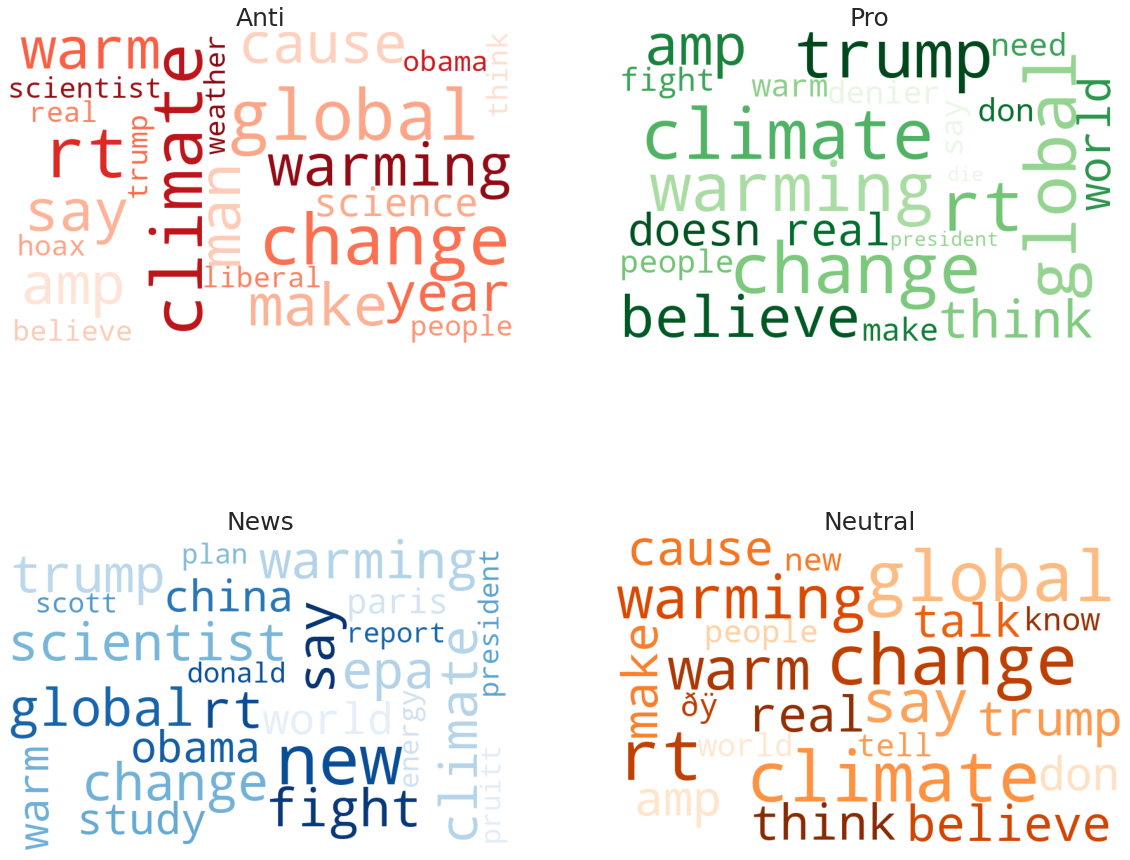

In [ ]:
#keywords under each category
cmaps = {"Anti": ("Reds", 110),"Pro" : ("Greens", 73),"News": ("Blues", 0),"Neutral": ("Oranges", 10)}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(2, 2, figsize=(20, 17))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()

In [ ]:
#crude entity extraction using spacy
spacy_en = spacy.load('en_core_web_sm')

In [ ]:
def crude_entities(tweet):
    as_words = tweet.apply(spacy_en)
    
    def by_label(words, label):
        filtered = [word.text for word in words.ents if word.label_ == label]
        return filtered
    
    def get_top(label, n=10):
        thing = as_words.apply(lambda x: by_label(x, label))
        flattened = itertools.chain(*thing.values)
        
        counter = Counter(flattened)
        topN = counter.most_common(n)
        
        topN_things = [thing for thing, _ in topN]
        
        return thing
    
    entities = pd.DataFrame()
    entities["people"] = get_top("PERSON", n=10)
    entities["geopolitics"] = get_top("GPE", n=10)
    entities["organizations"] = get_top("ORG")
    
    return entities

In [ ]:
entities = {}

by_sentiment = tweets.groupby("sentiment")

for sentiment, group in tqdm(by_sentiment):
    entities[sentiment] = crude_entities(group["lemmatized"])
    
display(pd.concat(entities, axis=1).head(n=100))

100%|██████████| 4/4 [05:30<00:00, 82.71s/it]


-1                                0                            \
   people geopolitics organizations people geopolitics organizations   
0      []          []            []    NaN         NaN           NaN   
1     NaN         NaN           NaN    NaN         NaN           NaN   
2     NaN         NaN           NaN    NaN         NaN           NaN   
3     NaN         NaN           NaN    NaN         NaN           NaN   
4     NaN         NaN           NaN    NaN         NaN           NaN   
..    ...         ...           ...    ...         ...           ...   
95    NaN         NaN           NaN    NaN         NaN           NaN   
96    NaN         NaN           NaN    NaN         NaN           NaN   
97    NaN         NaN           NaN    NaN         NaN           NaN   
98    NaN         NaN           NaN    NaN         NaN           NaN   
99    NaN         NaN           NaN    NaN         NaN           NaN   

                        1                               \
                   people    geopolitics organizations   
0                     NaN            NaN           NaN   
1                      []             []            []   
2            [leonardo s]             []            []   
3   [leonardodicaprio, ¦]             []            []   
4                     NaN            NaN           NaN   
..                    ...            ...           ...   
95                    NaN            NaN           NaN   
96                  [don]  [tallahassee]            []   
97                     []             []            []   
98           [al gore, ¦]             []            []   
99                    NaN            NaN           NaN   

                         2                            
                    people geopolitics organizations  
0                      NaN         NaN           NaN  
1                      NaN         NaN           NaN  
2                      NaN         NaN           NaN  
3                      NaN         NaN           NaN  
4     [rt pranita biswasi]          []            []  
..                     ...         ...           ...  
95  [alberta tory, notley]          []            []  
96                     NaN         NaN           NaN  
97                     NaN         NaN           NaN  
98                     NaN         NaN           NaN  
99                      []          []            []  

[100 rows x 12 columns]

From the above dataframe table, it is evident that the related tokens are grouped into people/ influencers, geopolitical regions and other NGOs. Here, Pranita Biswasi (climate activist), Leonardo Dicaprico (actor of documentary based on climate change) have been grouped under the category 'people' and 'tallahassee' has been grouped to the geopolitical region that concern climate change.

In [ ]:
X = tweets["message"]
Y = tweets["sentiment"]

In [ ]:
#Splitting the data into train, test and validation..

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=40)

In [ ]:
# Vectorizing the data from text using Countvectorizer(CV)

tfidf = CountVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_valid = tfidf.transform(X_valid)

In [ ]:
def train_Model(model, train_data, train_labels, test_data):

    model.fit(train_data, train_labels)
    
    return model, model.predict(test_data)

In [ ]:
def evaluate_Model(model, preds, test_labels):
    print(metrics.classification_report(test_labels, preds))
    
    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)
    
    sns.heatmap(cm_normd, cmap="YlGnBu", xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot_kws={"size": 10})
    
    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

          -1       0.52      0.49      0.51       633
           0       0.51      0.53      0.52      1244
           1       0.79      0.76      0.78      3678
           2       0.69      0.74      0.71      1476

    accuracy                           0.69      7031
   macro avg       0.63      0.63      0.63      7031
weighted avg       0.70      0.69      0.69      7031



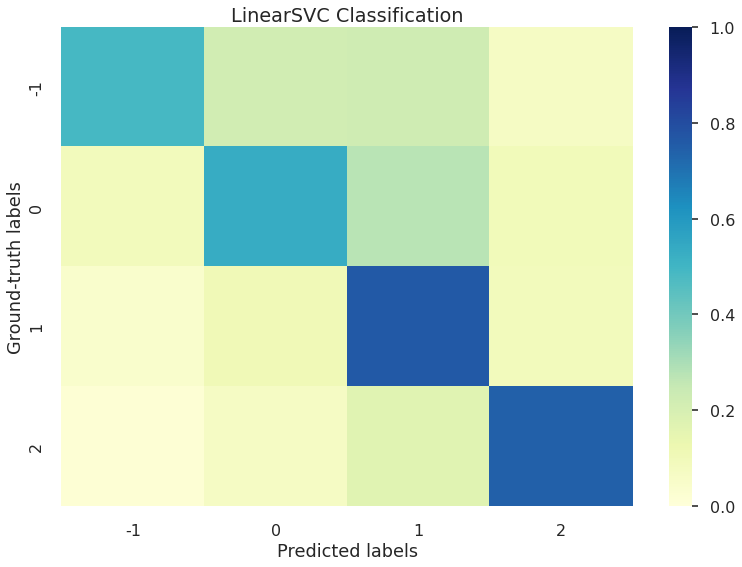

In [ ]:
svm_Linear = LinearSVC(penalty='l2', loss='squared_hinge', class_weight="balanced")
svm_Linear, preds = train_Model(svm_Linear, X_train, y_train, X_valid)
evaluate_Model(svm_Linear, preds, y_valid)

              precision    recall  f1-score   support

          -1       0.38      0.17      0.24       633
           0       0.27      0.72      0.39      1244
           1       0.71      0.55      0.62      3678
           2       0.74      0.27      0.39      1476

    accuracy                           0.48      7031
   macro avg       0.52      0.43      0.41      7031
weighted avg       0.61      0.48      0.49      7031



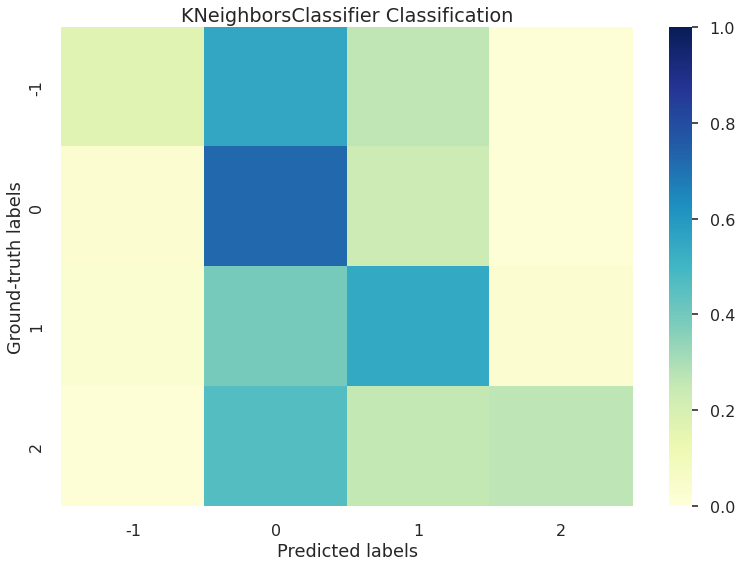

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
KNN, preds = train_Model(KNN, X_train, y_train, X_valid)
evaluate_Model(KNN, preds, y_valid)

              precision    recall  f1-score   support

          -1       0.71      0.28      0.40       633
           0       0.63      0.34      0.44      1244
           1       0.69      0.87      0.77      3678
           2       0.71      0.71      0.71      1476

    accuracy                           0.69      7031
   macro avg       0.69      0.55      0.58      7031
weighted avg       0.69      0.69      0.67      7031



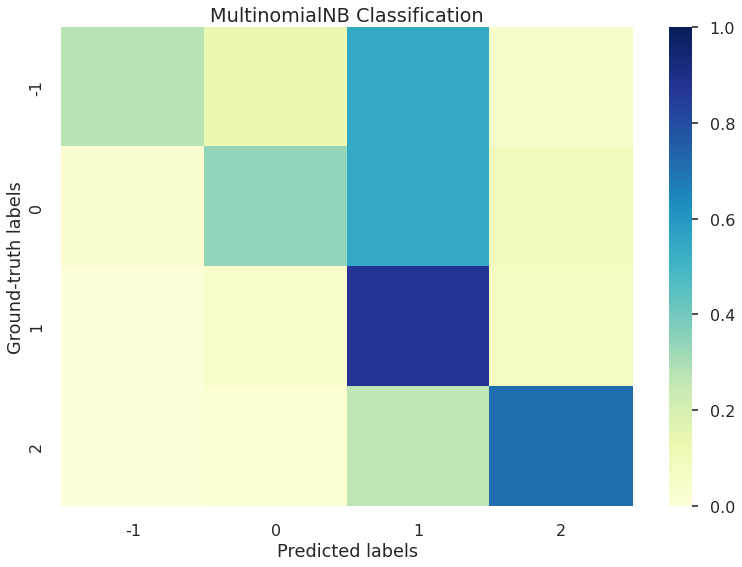

In [ ]:
nb = MultinomialNB()
vb, preds = train_Model(nb, X_train, y_train, X_valid)
evaluate_Model(nb, preds, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       633
           0       0.00      0.00      0.00      1244
           1       0.52      1.00      0.69      3678
           2       0.00      0.00      0.00      1476

    accuracy                           0.52      7031
   macro avg       0.13      0.25      0.17      7031
weighted avg       0.27      0.52      0.36      7031



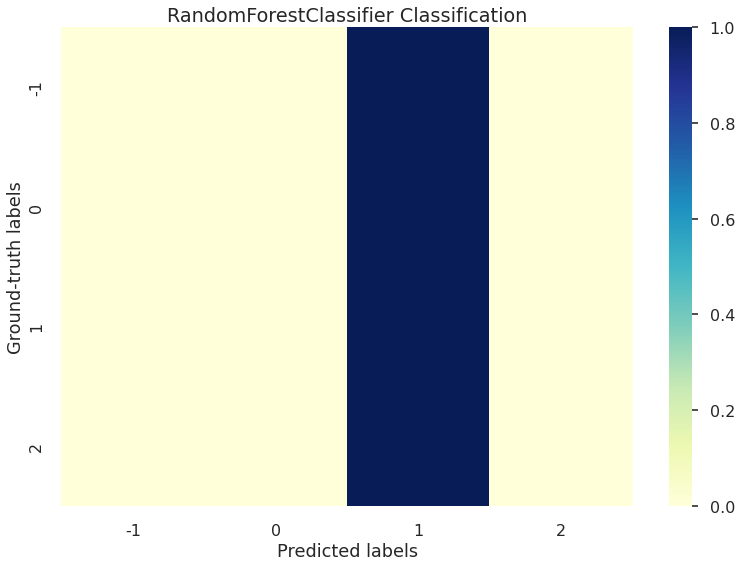

In [ ]:
RF = RandomForestClassifier(max_depth=5, n_estimators=100)
RF, preds = train_Model(RF, X_train, y_train, X_valid)
evaluate_Model(RF, preds, y_valid)

              precision    recall  f1-score   support

          -1       0.51      0.57      0.54       633
           0       0.51      0.59      0.55      1244
           1       0.83      0.71      0.77      3678
           2       0.69      0.79      0.74      1476

    accuracy                           0.70      7031
   macro avg       0.63      0.67      0.65      7031
weighted avg       0.71      0.70      0.70      7031



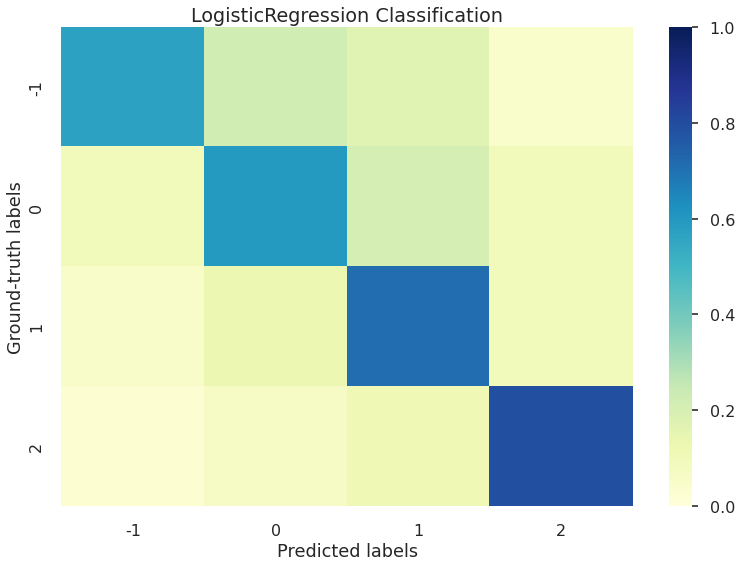

In [ ]:
LR = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
LR, preds = train_Model(LR, X_train, y_train, X_valid)
evaluate_Model(LR, preds, y_valid)

It is observed that, the Logistic Regression model gives the highest accuracy of about 70% compared to other models.